In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from random import randint
import scipy.stats as ss
#from scipy.stats import norm, kurtosis, skew
import itertools as itt
sns.set(rc={'figure.figsize':(11.7,8.27)})
import plots
import importlib
from pandas_datareader import data, wb
import datetime
import anovastats
#importlib.reload(plots)

# An Introductiony

## Example: Tips for Service
Let's assume that you are a small restaurant owner or a very business minded server at a nice restaurant. Here in the U.S. "tips" are a very important part of a waiter's pay. Most of the time the dollar amount of the tip is related to the dollar amount of the total bill.

As the waiter or owner, you would like to develop a model that will allow you to make a prediction about what amount of tip to expect for any given bill amount. Therefore one evening, you collect data for six meals.

Unfortunatly when you begin to look at your data, you realize you only collected data for the tip amount and not the meal amount also

How might you predict the tip amount for future meals using only this data?

In [6]:
tips_df = pd.DataFrame({'Tip amount ($)': [5.00,17.00,11.00,8.00,14.00,5.00], 'Meal #': [1,2,3,4,5,6]})
tips_df

,Meal #,Tip amount ($)
0,1,5.0
1,2,17.0
2,3,11.0
3,4,8.0
4,5,14.0
5,6,5.0


(0, 18)

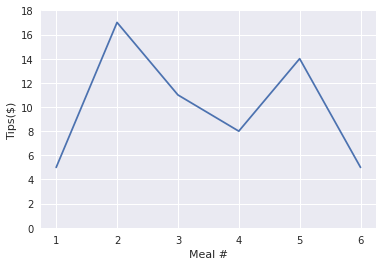

In [15]:
plt.plot(tips_df['Meal #'], tips_df['Tip amount ($)'])
plt.xlabel('Meal #')
plt.ylabel('Tips($)')
plt.ylim(0,18)

The best estimate for the next meal using only one variable is the mean

In [8]:
tips_mean = tips_df['Tip amount ($)'].mean()

Text(4,11,'best-fit line   $\\bar y = \\$10$')

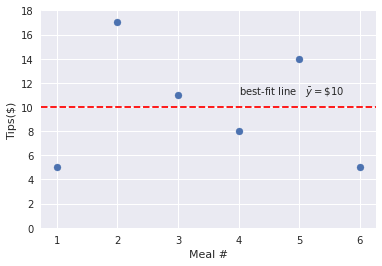

In [23]:
plt.scatter(tips_df['Meal #'], tips_df['Tip amount ($)'])
plt.xlabel('Meal #')
plt.ylabel('Tips($)')
plt.ylim(0,18)
plt.axhline(y=tips_mean, color='r', linestyle='--')
plt.text(4,11,'best-fit line   ' + r'$\bar y = \$10$')

With only one variable, and no other information, the best prediction for the next measurement is the mean of the sample itself. The variability in the tip amounts can only be explained by the tips themselves

## "Goodness of Fit" for the tips

In [28]:
tips_df.loc[4, 'Tip amount ($)']

14.0

The Residuals - the distance between the best fit line($10) and the observed values


Text(2.5,5,'RESIDUALS (ERROR)')

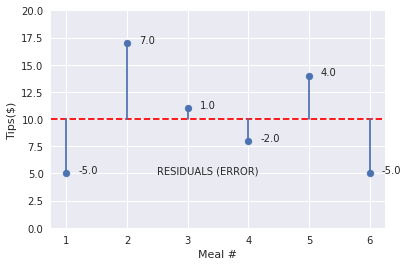

In [55]:
plt.scatter(tips_df['Meal #'], tips_df['Tip amount ($)'])
plt.xlabel('Meal #')
plt.ylabel('Tips($)')
plt.ylim(0,20)
plt.axhline(y=tips_mean, color='r', linestyle='--')
for i in range(0,6):
    normalized = tips_df.loc[i, 'Tip amount ($)']/(20-0)
    distance = tips_df.loc[i, 'Tip amount ($)'] - 10
    plt.axvline(i+1,.5,normalized)
    plt.text(i+1.2,tips_df.loc[i, 'Tip amount ($)'],distance)
    
print("The Residuals - the distance between the best fit line($10) and the observed values")
plt.text(2.5, 5,'RESIDUALS (ERROR)')

## Squaring the Residuals
#### Why square the residuals?
- makes them positive
- emphasizes larger deviations

In [62]:
tips_error = pd.DataFrame({'Meal #': range(1,7), 'Residual': tips_df['Tip amount ($)'] - 10, 'Residuals^2': (tips_df['Tip amount ($)'] - 10)**2})
tips_error

,Meal #,Residual,Residuals^2
0,1,-5.0,25.0
1,2,7.0,49.0
2,3,1.0,1.0
3,4,-2.0,4.0
4,5,4.0,16.0
5,6,-5.0,25.0


Sum of squared errors (SSE) = 120

In [65]:
print('The SSE is ' + str(tips_error['Residuals^2'].sum()))

The SSE is 120.0


## Sum of Squares
The goal of simple linear regression is to create a linear model that minimizes the sum of squares of the residuals / error (SSE)

If our regression model is significant, it will "eat up" much of the raw SSE we had when we assumed that the independent variable did not even exist. The regression line will/should literally fit the data better. It will minimize the residuals

When conducting simple linear regression with two variables, we will determine how good that line "fits" the data by comparing it to this type; where we pretend the second variable does not exist.

If a two-variable regression model looks like this example, what does the other variable do to help explain the dependent variable? NOTHING

## Description
Simple linear regression is really a comparison of two models
- One is where the independent variable does not even exist
- And the other uses the best fit regression line

If there is only one variable, the best prediction for other values is the mean of the "dependent" variable

The difference between the best-fit line and the observed value is called the residual (or error)

The residuals are squared and then added together to generate sum of squares residuals / error, SSE

Simple linear regression is designed to find the best fitting line through the data that minimizes the SSE

# Linear Regression and Linear Algebra
- The value of one variable, is a function of the other variable
- The value of y, is a function of x; y = f(x)
- The value of the dependent variable, x, is a function of the independent variable, x

## Algebra Review: Lines
- slope - intercept form of a line
\begin{equation}
y = mx+b
\end{equation}

x = random variable

m = slope of the line $\frac{rise}{run}$

b = y-intercept (crosses y-axis)

y-intercept - where x = 0 (Coordinate of (0,y))

Example:
- y = 2x + 3
- m = slope = $\frac{2}{1}$
- y = 2(0) + 3
- y = 3
- (0,3)


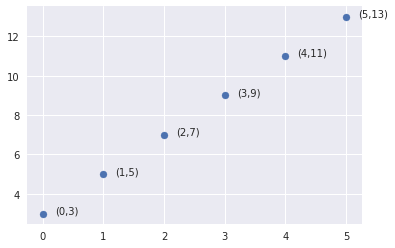

In [72]:
x = np.array(range(0,6))
y = 2*x + 3
plt.scatter(x, y)
for i in x:
    plt.text(i +.2, y[i], '(' + str(i) + ',' + str(y[i]) + ')')

# Simple Linear Regression Model
y = mx + b -->
\begin{equation}
y = \beta_0 + \beta_1x + \epsilon
\end{equation}

$\beta_0$ = y-intercept population parameter

$\beta_1$ = slope population parameter

$\epsilon$ = error term, unexplained variation in y

#### Simple Linear Regression Equation
\begin{equation}
E(y) = \beta_0 + \beta_1x
\end{equation}

E(y) is the mean or expected value for y, for a given value of x

## Distribution of y-values

Text(0.5,7,'E(y) can be in this range of distributions')

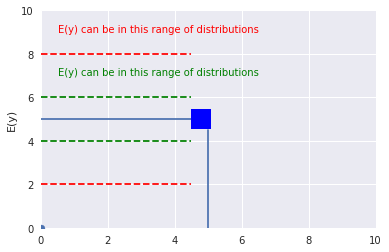

In [106]:
plt.scatter(0,0)
plt.ylim(0,10)
plt.xlim(0,10)
plt.axvline(5,0,.45)
plt.axhline(5,0,.45)
plt.axhline(6,0,.45, linestyle = '--', color = 'g')
plt.axhline(4,0,.45, linestyle = '--', color = 'g')
plt.axhline(8,0,.45, linestyle = '--', color = 'r')
plt.axhline(2,0,.45, linestyle = '--', color = 'r')
plt.ylabel('E(y)')
plt.axhline(5,.45,.6, linestyle = ':', linewidth = 20, color = 'b')
plt.text(.5,9,"E(y) can be in this range of distributions", color = 'r')
plt.text(.5,7,"E(y) can be in this range of distributions", color = 'g')

Text(0.5,1,'General Regression Lines')

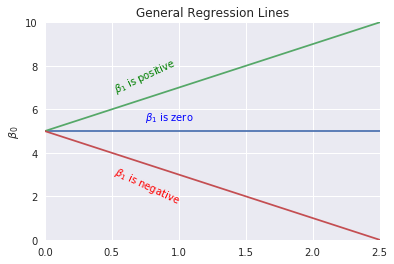

In [107]:
bo = 5
Ey = []
Ey.append(bo + 0*x)
Ey.append(bo + 2*x)
Ey.append(bo + (-2*x))
for i in Ey:
    plt.plot(x , i)
    
plt.ylim(0,10)
plt.xlim(0,2.5)
plt.ylabel(r'$\beta_0$')
plt.text(.5, 8, r'$\beta_1$' + ' is positive', color = 'g', rotation = 25)
plt.text(.75, 5.5, r'$\beta_1$' + ' is zero', color = 'b', rotation = 0)
plt.text(.5, 3, r'$\beta_1$' + ' is negative', color = 'r', rotation = -25)
plt.title("General Regression Lines")

If we actually knew the population parameters, $\beta_0$ and $\beta_1$, we could use the Simple Linear Regression Equation
\begin{equation}
E(y) = \beta_0 + \beta_1x
\end{equation}

In reality we almost never have the population parameters. Therefore we will estimate them using sample data. When using sample data, we have to change our equation

\begin{equation}
\hat{y} = b_0 + b_1x
\end{equation}

$\hat y$ is the point estimator of E(y)

$\hat y$, is the mean value of y for a given value of x

### When the Slope, $\beta_1 = 0$
When conducting simple linear regression with two variables, we will determine how good that line "fits" the data by comparing it to this type; where we pretend the second variable does not exist; the slope, $\beta_1 = 0$

In this situation, the value of $\hat y$ is 10 for every value of x
\begin{equation}
\hat{y} = b_0 + b_1x \\
\hat{y} = b_0 + 0x \\
\hat{y} = b_0 \\
b_0 = 10 \\
\hat{y} = 10
\end{equation}


The Residuals - the distance between the best fit line($10) and the observed values


Text(2.5,5,'RESIDUALS (ERROR)')

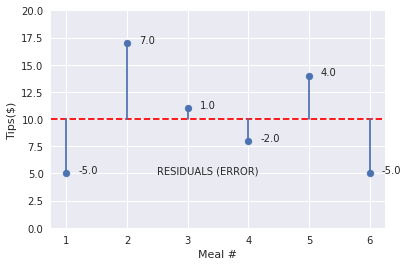

In [109]:
plt.scatter(tips_df['Meal #'], tips_df['Tip amount ($)'])
plt.xlabel('Meal #')
plt.ylabel('Tips($)')
plt.ylim(0,20)
plt.axhline(y=tips_mean, color='r', linestyle='--')
for i in range(0,6):
    normalized = tips_df.loc[i, 'Tip amount ($)']/(20-0)
    distance = tips_df.loc[i, 'Tip amount ($)'] - 10
    plt.axvline(i+1,.5,normalized)
    plt.text(i+1.2,tips_df.loc[i, 'Tip amount ($)'],distance)
    
print("The Residuals - the distance between the best fit line($10) and the observed values")
plt.text(2.5, 5,'RESIDUALS (ERROR)')

In [144]:
## Getting Ready for Least Squares
tips_df = pd.DataFrame({'Bill($)': [34.00,108.00,64.00,88.00,99.00,51.00],'Tip($)': [5.00,17.00,11.00,8.00,14.00,5.00]})
tips_df

,Bill($),Tip($)
0,34.0,5.0
1,108.0,17.0
2,64.0,11.0
3,88.0,8.0
4,99.0,14.0
5,51.0,5.0


(0, 18)

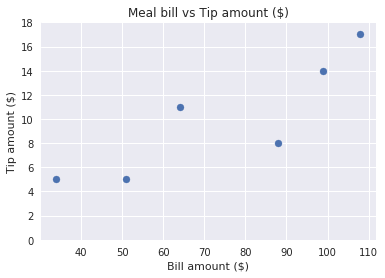

In [114]:
plt.scatter(tips_df['Bill($)'], tips_df['Tip($)'])
plt.xlabel('Bill amount ($)')
plt.ylabel('Tip amount ($)')
plt.title('Meal bill vs Tip amount ($)')
plt.ylim(0,18)

# Least Squares Method

## Example: Tips for Service
Let's assume that you are a small restaurant owner or a very business minded server at a nice restaurant. Here in the U.S. "tips" are a very important part of a waiter's pay. Most of the time the dollar amount of the tip is related to the dollar amount of the total bill.

As the waiter or owner, you would like to develop a model that will allow you to make a prediction about what amount of tip to expect for any given bill amount. Therefore one evening, you collect data for six meals.

You want to know to what degree the tip amount can be predicted by the bill. So the tip is the dependent variable; bill is the independent variable

In [115]:
tips_df

,Bill($),Tip($)
0,34.0,5.0
1,108.0,17.0
2,64.0,11.0
3,88.0,8.0
4,99.0,14.0
5,51.0,5.0


## Least Squares Criterion
\begin{equation}
min \sum (y_i - \hat y_i)^2
\end{equation}

$y_i$ = observed value of dependent variable (tip amount)

$\hat y_i$ = estimated (predicted) value of dependent variable (predicted tip amount)

The goal is to minimize the sum of the squared differences between the observed value for the dependent variable ($y_i$) and the estimated/predicted value of the dependent variable ($\hat y_i$) that is provided by the regression line. Sum of the squared residuals

Not only that, but the sum of the squared residuals should be much smaller than when we just used the dependent variable alone; $\beta_1 = 0$, $\hat y = 10$ for all values of x. That sum of squared residuals was 120

## Step 1: Scatter Plot

(0, 18)

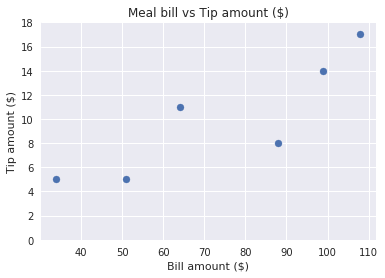

In [117]:
plt.scatter(tips_df['Bill($)'], tips_df['Tip($)'])
plt.xlabel('Bill amount ($)')
plt.ylabel('Tip amount ($)')
plt.title('Meal bill vs Tip amount ($)')
plt.ylim(0,18)

## Step 2: Look for a visual line
Does the data seem to fall along a line?

YES! PROCEED

If it doesn't, STOP

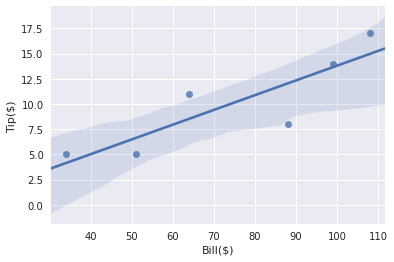

In [118]:
ax = sns.regplot(x="Bill($)", y="Tip($)", data=tips_df)

## Step 3: Correlation
What is the correlation coefficient, r?

r = 0.866

The relationship is strong

In [125]:
r = ss.pearsonr(tips_df['Bill($)'],tips_df['Tip($)'])
print('The Pearson Coefficient, r = ' + str(r[0]))

The Pearson Coefficient, r = 0.8656649996294481


## Step 4:Descriptive Statistics/ Centroid
Find the mean of each column

In [145]:
means = tips_df.mean()
means

Bill($)    74.0
Tip($)     10.0
dtype: float64

Text(76,10,' (74,10) CENTROID')

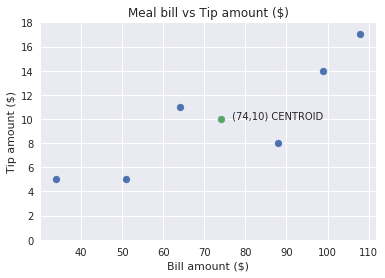

In [133]:
plt.scatter(tips_df['Bill($)'], tips_df['Tip($)'])
plt.xlabel('Bill amount ($)')
plt.ylabel('Tip amount ($)')
plt.title('Meal bill vs Tip amount ($)')
plt.scatter(tips_df.mean()[0], tips_df.mean()[1])
plt.ylim(0,18)
plt.text(76,10," (74,10) CENTROID")

# Step 5: Calculations
\begin{equation}
\hat y_i = b_0 + b_1x_i \\
\end{equation}
Slope
\begin{equation}
b_1 = \frac{\sum (x_i - \bar x)(y_i - \bar y)}{\sum(x_i - \bar x)^2}
\end{equation}

- $\bar x$ = mean of the independent variable
- $\bar y$ = mean of the dependent variable 
- $x_i$ = value of independent variable
- $y_i$ = value of the dependent variable

Intercept
\begin{equation}
b_0 = \bar y - b_1 \bar x
\end{equation}

In [141]:
tips_df1 = pd.DataFrame({'Total bill($)': [r'$x$'],'Tip amount($)': [r'$y$'], 'Bill deviation': [r'$x_i-\bar x$'], 'Tip Deviation': [r'$y_i-\bar y$'], 'Deviation Products': [r'$(x_i-\bar x)(y_i-\bar y)$'], 'Bill Deviations Squared': [r'$(x_i-\bar x)^2$']})
tips_df1[['Total bill($)','Tip amount($)', 'Bill deviation','Tip Deviation', 'Deviation Products', 'Bill Deviations Squared']]

,Total bill($),Tip amount($),Bill deviation,Tip Deviation,Deviation Products,Bill Deviations Squared
0,$x$,$y$,$x_i-\bar x$,$y_i-\bar y$,$(x_i-\bar x)(y_i-\bar y)$,$(x_i-\bar x)^2$


In [163]:
tips_df = pd.DataFrame({'Total bill($)': [34.00,108.00,64.00,88.00,99.00,51.00],'Tip amount($)': [5.00,17.00,11.00,8.00,14.00,5.00]})
tips_df['Bill deviation'] = tips_df['Total bill($)'] - means[0]
tips_df['Tip deviation'] = tips_df['Tip amount($)'] - means[1]
tips_df['Deviation Products'] = tips_df['Bill deviation'] * tips_df['Tip deviation']
tips_df['Bill Deviations Squared'] = tips_df['Bill deviation']**2
tips_df[['Total bill($)','Tip amount($)', 'Bill deviation','Tip deviation', 'Deviation Products', 'Bill Deviations Squared']]
tips_df.iloc[5] = [r'$\bar y = $ ' + str(means[1]), r'$\bar x = $ ' + str(means[0]),'-','-',r'$\sum = $ ' + str(tips_df['Deviation Products'].sum()),r'$\sum = $ ' + str(tips_df['Bill Deviations Squared'].sum())]
tips_df

,Tip amount($),Total bill($),Bill deviation,Tip deviation,Deviation Products,Bill Deviations Squared
0,5,34,-40,-5,200,1600
1,17,108,34,7,238,1156
2,11,64,-10,1,-10,100
3,8,88,14,-2,-28,196
4,14,99,25,4,100,625
5,$\bar y = $ 10.0,$\bar x = $ 74.0,-,-,$\sum = $ 615.0,$\sum = $ 4206.0


## Calculations (Slope)

In [164]:
tips_df[['Deviation Products', 'Bill Deviations Squared']]

,Deviation Products,Bill Deviations Squared
0,200,1600
1,238,1156
2,-10,100
3,-28,196
4,100,625
5,$\sum = $ 615.0,$\sum = $ 4206.0


\begin{equation}
b_1 = \frac{\sum (x_i - \bar x)(y_i - \bar y)}{\sum(x_i - \bar x)^2} \\
b_1 = \frac{615}{4206} \\
b_1 = 0.1462
\end{equation}

## $b_0$ Calculations (Y-Intercept)

In [165]:
tips_df[['Total bill($)', 'Tip amount($)']]

,Total bill($),Tip amount($)
0,34,5
1,108,17
2,64,11
3,88,8
4,99,14
5,$\bar x = $ 74.0,$\bar y = $ 10.0


\begin{equation}
b_0 = \bar y - b_1 \bar x \\
b_0 = 10 - (0.1462)74 \\
b_0 = -0.8188
\end{equation}

## Regression Line
\begin{equation}
\hat y_i = b_0 + b_1x_i \\
b_0 = -0.8188 \\
b_0 = 0.1462 \\
\hat y_i = 0.1462x - 0.8188
\end{equation}

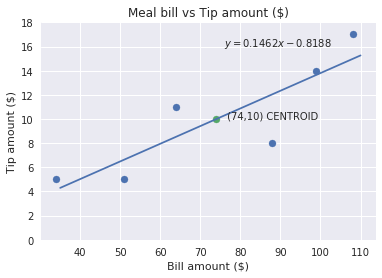

In [179]:
tips_df = pd.DataFrame({'Bill($)': [34.00,108.00,64.00,88.00,99.00,51.00],'Tip($)': [5.00,17.00,11.00,8.00,14.00,5.00]})
plt.scatter(tips_df['Bill($)'], tips_df['Tip($)'])
plt.xlabel('Bill amount ($)')
plt.ylabel('Tip amount ($)')
plt.title('Meal bill vs Tip amount ($)')
plt.scatter(tips_df.mean()[0], tips_df.mean()[1])
plt.ylim(0,18)
plt.text(76,10," (74,10) CENTROID")
plt.text(76,16, r'$y=0.1462x - 0.8188$')
x1 = np.linspace(35,110,6)
y1 = 0.1462*x1 - 0.8188
plt.plot(x1,y1)

For every $1 dollar amount (x) increases, we would expect the tip amount to increase by $0.1462 or about 15 cents

If the bill amount (x) is zero, then the expected/predicted tip amount is $-0.8188 or negative 82 cents! Does this make sense? NO. The intercept may or may not make sense in the "real world."

# Fit and the Coefficient of Determination

The Residuals - the distance between the best fit line($10) and the observed values


Text(0.5,1,'Tip amount($)')

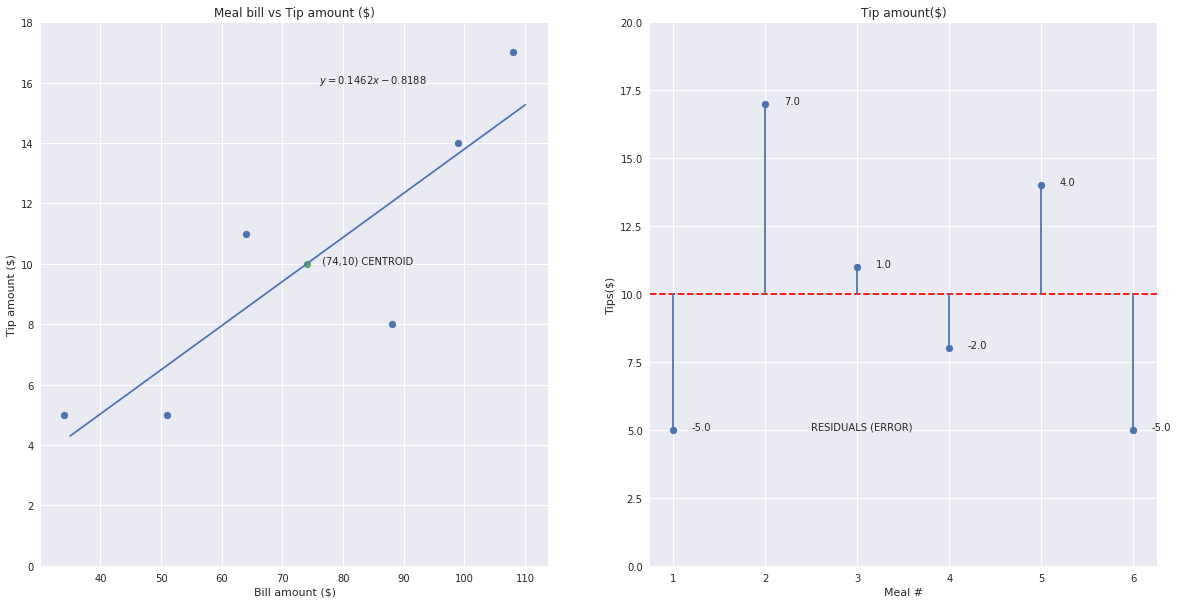

In [186]:
tips_df = pd.DataFrame({'Bill($)': [34.00,108.00,64.00,88.00,99.00,51.00],'Tip($)': [5.00,17.00,11.00,8.00,14.00,5.00]})
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(tips_df['Bill($)'], tips_df['Tip($)'])
ax1.set_xlabel('Bill amount ($)')
ax1.set_ylabel('Tip amount ($)')
ax1.set_title('Meal bill vs Tip amount ($)')
ax1.scatter(tips_df.mean()[0], tips_df.mean()[1])
ax1.set_ylim(0,18)
ax1.text(76,10," (74,10) CENTROID")
ax1.text(76,16, r'$y=0.1462x - 0.8188$')
x1 = np.linspace(35,110,6)
y1 = 0.1462*x1 - 0.8188
ax1.plot(x1,y1)

ax2 = fig.add_subplot(1,2,2)
ax2.scatter([1,2,3,4,5,6], tips_df['Tip($)'])
ax2.set_xlabel('Meal #')
ax2.set_ylabel('Tips($)')
ax2.set_ylim(0,20)
ax2.axhline(y=tips_mean, color='r', linestyle='--')
for i in range(0,6):
    normalized = tips_df.loc[i, 'Tip($)']/(20-0)
    distance = tips_df.loc[i, 'Tip($)'] - 10
    ax2.axvline(i+1,.5,normalized)
    ax2.text(i+1.2,tips_df.loc[i, 'Tip($)'],distance)
    
print("The Residuals - the distance between the best fit line($10) and the observed values")
ax2.text(2.5, 5,'RESIDUALS (ERROR)')
ax2.set_title('Tip amount($)')

With only the depandent variable, the only sum of squares is due to error. Therefore it is also the total, and MAXIMUM sum of squares for the data under analysis.
- SSE = 120
- SSE = SST
- SST = 120

With both IV and DV, the total sum of squares remains the same. But (ideally) the error sum of squares will be reduced significantly. The difference between SST and SSE is due to regression, SSR
- SST = 120
- SSE = ?
- SST - SSE = SSR

In [197]:
est_df = pd.DataFrame({'Total bill($)': [34.00,108.00,64.00,88.00,99.00,51.00],'Tip amount($)': [5.00,17.00,11.00,8.00,14.00,5.00]})
est_df['y hat Calc'] = ['y = 0.1462(34) - 0.8188','y = 0.1462(108) - 0.8188','y = 0.1462(64) - 0.8188','y = 0.1462(88) - 0.8188','y = 0.1462(99) - 0.8188','y = 0.1462(51) - 0.8188']
est_df[r'$\hat y_i$' + '(predicted tip amount)'] = est_df['Total bill($)'].apply(lambda x: 0.1462*x - 0.8188) 
est_df

,Tip amount($),Total bill($),y hat Calc,$\hat y_i$(predicted tip amount)
0,5.0,34.0,y = 0.1462(34) - 0.8188,4.1520
1,17.0,108.0,y = 0.1462(108) - 0.8188,14.9708
2,11.0,64.0,y = 0.1462(64) - 0.8188,8.5380
3,8.0,88.0,y = 0.1462(88) - 0.8188,12.0468
4,14.0,99.0,y = 0.1462(99) - 0.8188,13.6550
5,5.0,51.0,y = 0.1462(51) - 0.8188,6.6374


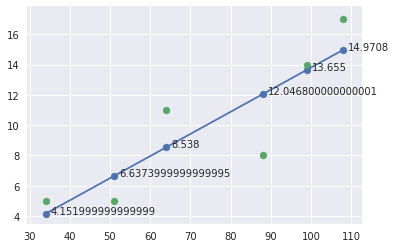

In [220]:
plt.scatter(np.sort(est_df['Total bill($)']), np.sort(est_df[r'$\hat y_i$' + '(predicted tip amount)']))
sorted_value = np.sort(est_df[r'$\hat y_i$' + '(predicted tip amount)'])
sorted_index = np.sort(est_df['Total bill($)'])
j = 0
for i in sorted_index:
    plt.text(i+1.2,sorted_value[j], sorted_value[j])
    j = j+1
plt.plot(np.sort(est_df['Total bill($)']), np.sort(est_df[r'$\hat y_i$' + '(predicted tip amount)']))
plt.scatter(tips_df['Bill($)'], tips_df['Tip($)'])


In [218]:
est_df['Error(observed - predicted)'] = est_df['Tip amount($)'] - est_df[r'$\hat y_i$' + '(predicted tip amount)']
est_df['Squared Error'] = est_df['Error(observed - predicted)']**2
print('SSE = ' + str(est_df['Squared Error'].sum()))
est_df[['Total bill($)','Tip amount($)', r'$\hat y_i$' + '(predicted tip amount)', 'Error(observed - predicted)','Squared Error']]


SSE = 30.074894640000007


,Total bill($),Tip amount($),$\hat y_i$(predicted tip amount),Error(observed - predicted),Squared Error
0,34.0,5.0,4.1520,0.8480,0.719104
1,108.0,17.0,14.9708,2.0292,4.117653
2,64.0,11.0,8.5380,2.4620,6.061444
3,88.0,8.0,12.0468,-4.0468,16.376590
4,99.0,14.0,13.6550,0.3450,0.119025
5,51.0,5.0,6.6374,-1.6374,2.681079


D.V. and I.V (Tip amount as a function of meal amount) has a SSE = 30.075

D.V (Tip amount) ONLY has a SSE = 120

So when we conducted the regression, the SSE decreased from 120 to 30.075. That is, 30.075 of the sum of squares was explained or allocated to ERROR.

Where did the other 89.925 go? The 89.925 is the sum of squares due to REGRESSION

SST = SSR + SSE

120 = 89.925 + 30.075

## Coefficient of Determination
How well does the estimated regression equation fit our data?

This is where regression begins to look a lot like ANOVA; the total sum of squares is partitioned or allocated to SSE and SSR

If SSR is large, it uses up more of SST and therefore SSE is smaller relative to SST. The coefficient of determination quantifies this ratio as a percentage.

Coefficient of Determination =
\begin{equation}
r^2 = \frac{SSR}{SST}
\end{equation}

Coefficient of Determination =
\begin{equation}
r^2 = \frac{SSR}{SST} \\
r^2 = \frac{89.925}{120} \\
r^2 = 0.7493 or 74.92\%
\end{equation}

We can conclude that 74.93% of the total sum of squares can be explained by using the estimated regression equation to predict the tip amount. The remainder is error.

$\hat y_i$ = 0.1462x - 0.8188

where x is the dollar amount of the bill

Text(100,8,'$SST = \\sum (y_i - \\bar y_i)^2$')

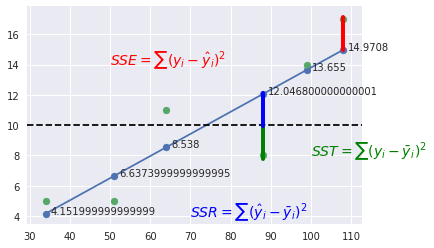

In [258]:
plt.scatter(np.sort(est_df['Total bill($)']), np.sort(est_df[r'$\hat y_i$' + '(predicted tip amount)']))
sorted_value = np.sort(est_df[r'$\hat y_i$' + '(predicted tip amount)'])
sorted_index = np.sort(est_df['Total bill($)'])
j = 0
for i in sorted_index:
    plt.text(i+1.2,sorted_value[j], sorted_value[j])
    j = j+1
plt.plot(np.sort(est_df['Total bill($)']), np.sort(est_df[r'$\hat y_i$' + '(predicted tip amount)']))
plt.scatter(tips_df['Bill($)'], tips_df['Tip($)'])
plt.axhline(10,0,1, linestyle='--', color ='black')
plt.axvline(88, .3, .45, color = 'g', linewidth =4)
plt.axvline(88, .45, .6, color = 'b', linewidth =4)
plt.axvline(108, .8, .95, color = 'r', linewidth =4)
plt.text(50, 14, r'$SSE = \sum (y_i - \hat y_i)^2$', color = 'r', fontsize=14)
plt.text(70, 4, r'$SSR = \sum (\hat y_i - \bar y_i)^2$', color = 'b', fontsize=14)
plt.text(100, 8, r'$SST = \sum (y_i - \bar y_i)^2$', color = 'g', fontsize=14)